In [2]:
import numpy as np
import pandas as pd
from os.path import join as oj
import os
import pandas as pd
import sys
import inspect
import datetime
from scipy.stats import percentileofscore
# currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
# parentdir = os.path.dirname(currentdir)
#parentdir = "/home/ubuntu/new_uploader"
parentdir = "/usr/local/google/home/danqingwang/covid19-severity-prediction"
sys.path.append(parentdir)
sys.path.append(parentdir + '/modeling')
import load_data
from fit_and_predict import add_preds
from functions import merge_data
from viz import  viz_interactive
import numpy as np
import pandas as pd
from os.path import join as oj
import os
import pandas as pd
import sys
import matplotlib as plt
from scipy.stats import percentileofscore
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm


# CHANGE THIS
from exponential_modeling import *
from fit_and_predict import *
# Function to Train CLEP on your Hospital Data
# Default: 7 Days Prediction
exponential = {'model_type':'exponential'}
shared_exponential = {'model_type':'shared_exponential'}
linear = {'model_type':'linear'}
advanced_model = {'model_type':'advanced_shared_model'}
def predict(df, k, outcome = "hospitalizations"):
        
    hospitz = df[outcome].values
        
    df_h = pd.DataFrame({"Hospital": ["Hospital_Name"], "hospitalizations": [hospitz]})
    for num_days_in_future in range(k): # 1 is tomorrow
        output_key = f'Predicted {outcome} {num_days_in_future}-day'    
        df_h = fit_and_predict_ensemble(df_h, 
                                        methods=[shared_exponential,linear],
                                        outcome=outcome.lower(),
                                        mode='predict_future',
                                        target_day=np.array([num_days_in_future]),
                                        output_key=output_key,
                                        verbose=False)

        vals = df_h[output_key].values
        out = []
        for i in range(vals.shape[0]):
            if np.isnan(vals[i]):
                out.append(0)
            else:
                out.append(max(vals[i][0],
                                list(df_h[outcome.lower()])[i][-1]))
            df_h[output_key] = out
    print(df_h)
    return ensemble_prediction

Loading BokehJS ...

In [3]:
# Function to Train CLEP on your Hospital Data
# Default: 7 Days Prediction
exponential = {'model_type':'exponential'}
shared_exponential = {'model_type':'shared_exponential'}
linear = {'model_type':'linear'}
advanced_model = {'model_type':'advanced_shared_model'}

def predict(df, k, output_var = "hospitalizations"):
        
    hospitz = df[output_var].values
        
    df_h = pd.DataFrame({"Hospital": ["Hospital_Name"], "hospitalizations": [hospitz]})
    tmp = []
    tmp1 = []
    for i in range(k):
        tmp.append(max(0, fit_and_predict_ensemble(df_h,target_day = np.array([i + 1]),
                outcome = 'hospitalizations', 
                methods = [shared_exponential,linear],
                mode = 'predict_future', 
                verbose = False)['predicted_hospitalizations_ensemble_' + str(i + 1)].values[0][0]))
        output_key = f'Predicted {output_var} Intervals'
    x = add_prediction_intervals(df_h, 
                             target_day=np.array(np.array([i + 1 for i in range(k)])),
                             outcome="hospitalizations", 
                             methods=[shared_exponential,linear],
                             interval_type='local',
                             output_key = output_key)
    df_h['predicton'] = [tmp]
    print(x)
    return df_h
    

In [5]:
data = pd.read_csv("/usr/local/google/home/danqingwang/hospital-website/UC_Hospitalizations.csv")
output = data.columns[1:]
data = data.dropna()
print(data)
output

          Date  UCSF  UCSD  UCLA   UCD   UCI
0   03-18-2020   8.0  10.0  18.0   4.0   1.0
1   03-19-2020   9.0  11.0  20.0   6.0   2.0
2   03-20-2020  12.0  11.0  22.0   7.0   4.0
3   03-21-2020  10.0  10.0  23.0   7.0   5.0
4   03-22-2020  11.0  10.0  21.0   8.0   3.0
..         ...   ...   ...   ...   ...   ...
88  06-14-2020  19.0  35.0  26.0   6.0  50.0
89  06-15-2020  18.0  39.0  27.0   8.0  55.0
90  06-16-2020  16.0  39.0  27.0   8.0  53.0
91  06-17-2020  15.0  39.0  27.0   9.0  54.0
92  06-18-2020  14.0  38.0  25.0  10.0  48.0

[93 rows x 6 columns]


Index(['UCSF', 'UCSD', 'UCLA', 'UCD', 'UCI'], dtype='object')

In [6]:
d = predict(data,7, output[0])

TypeError: compute_pmdl_weight() got an unexpected keyword argument 'prev_days'

In [19]:
print(d)

        Hospital                                   hospitalizations  \
0  Hospital_Name  [8.0, 9.0, 12.0, 10.0, 11.0, 12.0, 10.0, 12.0,...   

                                           y_preds_0  \
0  [14.325173191906364, 14.610022952766844, 14.85...   

                                           y_preds_1  \
0  [12.50000000000001, 11.200000000000014, 9.9000...   

  predicted_hospitalizations_ensemble_1 predicted_hospitalizations_ensemble_2  \
0                  [13.451666862837488]                  [12.978026249812427]   

  predicted_hospitalizations_ensemble_3 predicted_hospitalizations_ensemble_4  \
0                   [12.48575557596078]                  [11.977032487512211]   

  predicted_hospitalizations_ensemble_5 predicted_hospitalizations_ensemble_6  \
0                   [11.45382140833102]                   [10.91788304508236]   

  predicted_hospitalizations_ensemble_7  \
0                  [10.370787157163212]   

                                     previous_errors  \

In [7]:
print(d['hospitalizations'])

NameError: name 'd' is not defined

In [176]:
for i in np.array(3):
    print(i)

TypeError: iteration over a 0-d array

In [20]:
d

Hospital                                   hospitalizations  \
0  Hospital_Name  [8.0, 9.0, 12.0, 10.0, 11.0, 12.0, 10.0, 12.0,...   

                                           y_preds_0  \
0  [14.325173191906364, 14.610022952766844, 14.85...   

                                           y_preds_1  \
0  [12.50000000000001, 11.200000000000014, 9.9000...   

  predicted_hospitalizations_ensemble_1 predicted_hospitalizations_ensemble_2  \
0                  [13.451666862837488]                  [12.978026249812427]   

  predicted_hospitalizations_ensemble_3 predicted_hospitalizations_ensemble_4  \
0                   [12.48575557596078]                  [11.977032487512211]   

  predicted_hospitalizations_ensemble_5 predicted_hospitalizations_ensemble_6  \
0                   [11.45382140833102]                   [10.91788304508236]   

  predicted_hospitalizations_ensemble_7  \
0                  [10.370787157163212]   

                                     previous_errors  \
0  {1: [-0.03050356956481981, -0.0400317985543062...   

                                     new_predictions  \
0  [13.451666862837488, 12.978026249812427, 12.48...   

                            Predicted UCSF Intervals  \
0  [(14.0, 14.85684103015992), (14.0, 14.88395308...   

                                           predicton  
0  [13.451666862837488, 12.978026249812427, 12.48...

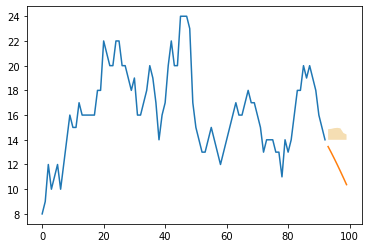

In [45]:
figure = plt.figure()
plt.plot([i for i in range(len(d['hospitalizations'][0]))], d['hospitalizations'][0])
plt.plot([i + len(d['hospitalizations'][0]) for i in range(len(d['new_predictions'][0]))], d['new_predictions'][0])
plt.fill_between([i + len(d['hospitalizations'][0]) for i in range(len(d['new_predictions'][0]))],[x[0] for x in d['Predicted UCSF Intervals'][0]],[x[1] for x in d['Predicted UCSF Intervals'][0]],facecolor='wheat')

Hospital                                   hospitalizations  \
0  Hospital_Name  [8.0, 9.0, 12.0, 10.0, 11.0, 12.0, 10.0, 12.0,...   

                                           y_preds_0  \
0  [14.325173191906364, 14.610022952766844, 14.85...   

                                           y_preds_1  \
0  [12.50000000000001, 11.200000000000014, 9.9000...   

  predicted_hospitalizations_ensemble_1 predicted_hospitalizations_ensemble_2  \
0                  [13.451666862837488]                  [12.978026249812427]   

  predicted_hospitalizations_ensemble_3 predicted_hospitalizations_ensemble_4  \
0                   [12.48575557596078]                  [11.977032487512211]   

  predicted_hospitalizations_ensemble_5 predicted_hospitalizations_ensemble_6  \
0                   [11.45382140833102]                   [10.91788304508236]   

  predicted_hospitalizations_ensemble_7  \
0                  [10.370787157163212]   

                                     previous_errors  \
0  {1: [-0.03050356956481981, -0.0400317985543062...   

                                     new_predictions  \
0  [13.451666862837488, 12.978026249812427, 12.48...   

                            Predicted UCSF Intervals  \
0  [(14.0, 14.85684103015992), (14.0, 14.88395308...   

                                           predicton  
0  [13.451666862837488, 12.978026249812427, 12.48...

In [43]:
d['new_predictions'][0]

array([13.45166686, 12.97802625, 12.48575558, 11.97703249, 11.45382141,
       10.91788305, 10.37078716])

In [15]:
#SEMA: start_day=25
#def Model1(df,start_day,k,smooth_days = 10,predictors = [shared_exponential,linear],MEPI = True):

#CLEP: start_day=25
def Model1(df,start_day,k,smoothing = True, smooth_days = 10,predictors = [linear, shared_exponential],MEPI = True):
    hosp_list = list(df.columns)
    Model1_Predictions = np.zeros((len(df)-start_day-k+1,len(hosp_list)))
    MEPI_predictions = np.zeros((len(df)-start_day-k+1,len(hosp_list)))
    for i in range(start_day,len(df)-k+1):
        hosp_data = []
        for name in hosp_list: 
            hosp_data.append(np.array(df[name])[:i])
        dicti = {"hosp":hosp_list,"hospitalizations" : hosp_data}
        df_shared = pd.DataFrame(dicti)
        feat_transforms = defaultdict(lambda y: [lambda x: x]) 
        feat_transforms['hospitalizations'] = [lambda x: np.log(x+1)]
        ensemble_future_prediction = fit_and_predict_ensemble(df_shared,
                                        target_day = np.array([k]),
                                        outcome = 'hospitalizations', 
                                        methods = predictors,
                                            mode = 'predict_future', verbose = False, smoothing = smoothing, smooth_days = smooth_days,
                                        weight_c0 = 2,
                                        weight_mu = 0.5)['predicted_hospitalizations_ensemble_'+str(k)].values
        if MEPI:
            x = add_prediction_intervals(df_shared, 
                             target_day = np.array([k]),
                             outcome = 'hospitalizations', 
                             methods = predictors,
                             interval_type = 'local', smooth = smoothing, days_to_smooth = smooth_days,
                             look_back_day = 5,output_key = "hospital intervals")
           
        
        for (j,name) in enumerate(hosp_list):
            Model1_Predictions[i-start_day,j] = np.array(ensemble_future_prediction)[j]
            if MEPI: 
                interval = x["hospital intervals"].values[j][0][1] - x["new_predictions"].values[j][0]
                MEPI_predictions[i-start_day,j] = interval

    return Model1_Predictions,MEPI_predictions
    #return Model1_Predictions

In [9]:
def Coverage(Predictions,Intervals,df,start_day,k):
    coverage = np.zeros(len(df.columns))
    eval_period = len(df)-start_day-k+1
    for (j,name) in enumerate(df.columns):
        for i in range(eval_period):
            lower_bound = max(Predictions[i,j]-Intervals[i,j],0)
            upper_bound = Predictions[i,j]+Intervals[i,j]
            if(lower_bound<=df[name][start_day+k-1+i]<=upper_bound):
                coverage[j] = coverage[j]+1
    coverage = coverage/(eval_period)
    return coverage

In [10]:
def Normalized_length(Predictions,Intervals,df,start_day,k):
    norm_length = np.zeros(len(df.columns))
    eval_period = len(df)-start_day-k+1
    for (j,name) in enumerate(df.columns):
        for i in range(eval_period):
            lower_bound = max(Predictions[i,j]-Intervals[i,j],0)
            upper_bound = Predictions[i,j]+Intervals[i,j]
            norm_length[j] = norm_length[j] + (upper_bound-lower_bound)/df[name][start_day+k-1+i]
    norm_length = norm_length/(eval_period)
    return norm_length

In [11]:
def Model1_Preds(df,start_day,k): #Generates MEPI predictions as well
    model = Model1(df,start_day,k)
    Predictions = model[0]
    print(Predictions.shape)
    Intervals = model[1]
    cov = Coverage(Predictions,Intervals,df_uc,start_day,k)
    n_len = Normalized_length(Predictions,Intervals,df_uc,start_day,k)
    print("WE DID IT")
    #+ str(SEMA_MAE[i])[:5]
    print("average coverage is: " + str(np.mean(cov)))
    print("average length is: " + str(np.mean(n_len)))
    for (i,name) in enumerate(list(df.columns)):
                SEMA_MAE = mean_absolute_error(np.array(Predictions[:,i]),df[name].to_numpy()[start_day+k-1:])
                figure = plt.figure()
                plt.plot(dates, df[name].to_numpy()[start_day+k-1:],'darkorange',label = name + " True")
                plt.plot(dates, Predictions[:,i],'darkorange',linestyle = 'dashed',label = "MA coverage: " + str(cov[i])[:5]  )
                a = np.maximum(np.zeros(Predictions[:,i].shape[0]), Predictions[:,i]-Intervals[:,i])
                plt.fill_between(dates,a,Predictions[:,i]+Intervals[:,i],facecolor = 'wheat')
                plt.title(name)
                plt.legend()
                plt.xticks(rotation=40)
                plt.ylabel("Covid-19 Hospitalizations")
                #plt.xlabel("Days since 19/04/2020")
                plt.savefig("UCSF_Hospitalizations_plots/ModifiedCLEP_MEPI"+name+"_"+str(k)+".jpg",dpi = 150)
                plt.show()
                print("For " + str(k) + "-day ahead prediction,with start day " + str(start_day) + " " + name + " Model 1 has MAE: ")
                print(mean_absolute_error(np.array(Predictions[:,i]),df[name].to_numpy()[start_day+k-1:]))
                print("Coverage achieved is:" + str(cov[i]))
                print("Normalized Length is:" + str(n_len[i]))

In [16]:
Model1(data,25,14)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [58]:
data

Date  UCSF  UCSD  UCLA   UCD   UCI
0   03-18-2020   8.0  10.0  18.0   4.0   1.0
1   03-19-2020   9.0  11.0  20.0   6.0   2.0
2   03-20-2020  12.0  11.0  22.0   7.0   4.0
3   03-21-2020  10.0  10.0  23.0   7.0   5.0
4   03-22-2020  11.0  10.0  21.0   8.0   3.0
..         ...   ...   ...   ...   ...   ...
88  06-14-2020  19.0  35.0  26.0   6.0  50.0
89  06-15-2020  18.0  39.0  27.0   8.0  55.0
90  06-16-2020  16.0  39.0  27.0   8.0  53.0
91  06-17-2020  15.0  39.0  27.0   9.0  54.0
92  06-18-2020  14.0  38.0  25.0  10.0  48.0

[93 rows x 6 columns]